In [44]:
# importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

# Importing the Data

In [45]:
result_df = pd.read_csv('../data/kaggle/results.csv')
stats_df = pd.read_csv('../data/kaggle/status.csv')
drivers_df = pd.read_csv('../data/kaggle/drivers.csv')
races_df = pd.read_csv('../data/kaggle/races.csv')
constructor_df = pd.read_csv('../data/kaggle/constructors.csv')
driver_standings_df = pd.read_csv('../data/kaggle/driver_standings.csv')
pd.get_option("display.max_columns",None)

In [46]:
result_df.head() 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [47]:
stats_df.head() 

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [48]:
drivers_df.head() 

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [49]:
races_df.head() 

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [50]:
constructor_df.head() 

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [51]:
driver_standings_df.head() 

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


# Future Engineering

In [52]:
# merging all seperate dataframe into single dataframe as df

con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name_x,date,time_y,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality_x,url_y,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [53]:
# checking of null values

df.isna().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
year                 0
round                0
circuitId            0
name_x               0
date                 0
time_y               0
url_x                0
fp1_date             0
fp1_time             0
fp2_date             0
fp2_time             0
fp3_date             0
fp3_time             0
quali_date           0
quali_time           0
sprint_date          0
sprint_time          0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
url_y                0
driverStand

In [54]:
# There's no null values in the dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473301 entries, 0 to 3473300
Data columns (total 54 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time_x             object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  year               int64  
 19  round              int64  
 20  circuitId          int64  
 21  name_x             object 
 22  date               object 
 23  time_y             object 
 24  url_x              object 
 25  fp1_date          

# Describe
Describe function is used to show the statistical value of each column. which all include:

* Count of the column
* Mean value of the column
* Standard Deviation of the column
* Minimum value of the column
* 25% percentile of the column
* 50% percentile of the column
* 75% percentile of the column
* Maximum value of the column

In [56]:
# summary
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
resultId,3473301.0,12415.265082,8107.902357,1.0,5010.0,11521.0,20889.0,25845.0
raceId_x,3473301.0,507.855131,326.308015,1.0,230.0,460.0,845.0,1096.0
driverId,3473301.0,196.481293,257.520932,1.0,20.0,102.0,223.0,856.0
constructorId,3473301.0,38.647993,55.969308,1.0,6.0,16.0,37.0,214.0
grid,3473301.0,9.785797,6.572033,0.0,4.0,9.0,15.0,34.0
positionOrder,3473301.0,11.271079,7.397564,1.0,5.0,10.0,17.0,39.0
points_x,3473301.0,2.928181,5.253690,0.0,0.0,0.0,4.0,50.0
laps,3473301.0,48.220800,25.241171,0.0,32.0,54.0,67.0,200.0
statusId,3473301.0,13.347916,22.572507,1.0,1.0,5.0,12.0,141.0
year,3473301.0,1995.992342,17.179497,1950.0,1983.0,1998.0,2011.0,2022.0


In [57]:
df.columns

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name_x',
       'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_y',
       'driverStandingsId', 'raceId_y', 'points_y', 'position_y',
       'positionText_y', 'wins', 'constructorRef', 'name_y', 'nationality_y',
       'url', 'status'],
      dtype='object')

In [58]:
# droping unwanted columns 

df = df.drop(['url','url_x','position_x','fastestLapTime','positionText_x','time_x','time_y','driverRef',
              'constructorRef','nationality_y','url_y','positionText_y','raceId_y','points_y'],1)

In [59]:
# changing of old column name to meaningful name 

col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,company,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [60]:
# Adding two column (forename,surname) to create a single column called driver_name

df['driver_name'] = df['forename']+' '+df['surname']

In [61]:
df = df.drop(['forename','surname'],1)

# Converting dtype

Changing of data type from object to date to calculate the driver's age.

In [62]:
# converting to date format from string 

pd.to_datetime(df.date)

0         2008-03-16
1         2008-03-16
2         2008-03-16
3         2008-03-16
4         2008-03-16
             ...    
3473296   1951-05-30
3473297   1951-05-30
3473298   1951-05-30
3473299   1951-05-30
3473300   1951-05-30
Name: date, Length: 3473301, dtype: datetime64[ns]

In [63]:
df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])

In [64]:
from datetime import datetime

In [65]:
# calculating driver's age and creating it as a new column

dates = datetime.today()-df['dob']
age = dates.dt.days/365

In [66]:
df['age'] = round(age)

In [67]:
pd.set_option('display.max_columns', None)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [68]:
# changing datatype

l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [69]:
df.drop('driver_num',1,inplace=True)

In [70]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [71]:
df[cat].head()

,grand_prix,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,nationality,company,status,driver_name
0,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,British,McLaren,Finished,Lewis Hamilton
1,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,British,McLaren,Finished,Lewis Hamilton
2,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,British,McLaren,Finished,Lewis Hamilton
3,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,British,McLaren,Finished,Lewis Hamilton
4,Australian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,British,McLaren,Finished,Lewis Hamilton


In [72]:
df[num].head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,date,dob,driverStandingsId,position,wins,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,2008-03-16,1985-01-07,1,1,1,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,2008-03-16,1985-01-07,9,1,1,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,2008-03-16,1985-01-07,27,3,1,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,2008-03-16,1985-01-07,48,2,1,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,2008-03-16,1985-01-07,69,3,1,38.0


In [73]:
df.dtypes

resultId                          int64
racerId                           int64
driverId                          int64
constructorId                     int64
number                          float64
grid                              int64
positionOrder                     int64
points                          float64
laps                              int64
timetaken_in_millisec           float64
fastestLap                      float64
rank                            float64
max_speed                       float64
statusId                          int64
year                              int64
round                             int64
circuitId                         int64
grand_prix                       object
date                     datetime64[ns]
fp1_date                         object
fp1_time                         object
fp2_date                         object
fp2_time                         object
fp3_date                         object
fp3_time                         object


In [74]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [75]:
df.isnull().sum() / len(df) * 100

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.004607
grid                      0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
timetaken_in_millisec    61.979598
fastestLap               61.571744
rank                     60.601802
max_speed                61.571744
statusId                  0.000000
year                      0.000000
round                     0.000000
circuitId                 0.000000
grand_prix                0.000000
date                      0.000000
fp1_date                  0.000000
fp1_time                  0.000000
fp2_date                  0.000000
fp2_time                  0.000000
fp3_date                  0.000000
fp3_time                  0.000000
quali_date                0.000000
quali_time                0.000000
sprint_date               0.000000
sprint_time         

In [76]:
df['max_speed'].mean()

203.7701672780725

In [77]:
df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [78]:
df.isnull().sum() / len(df) * 100

resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
number                   0.0
grid                     0.0
positionOrder            0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
rank                     0.0
max_speed                0.0
statusId                 0.0
year                     0.0
round                    0.0
circuitId                0.0
grand_prix               0.0
date                     0.0
fp1_date                 0.0
fp1_time                 0.0
fp2_date                 0.0
fp2_time                 0.0
fp3_date                 0.0
fp3_time                 0.0
quali_date               0.0
quali_time               0.0
sprint_date              0.0
sprint_time              0.0
driver_code              0.0
dob                      0.0
nationality              0.0
driverStandingsId        0.0
position                 0.0
wins          

In [79]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3473301.0,1.241527e+04,8107.902357,1.00,5.010000e+03,1.152100e+04,2.088900e+04,25845.00
racerId,3473301.0,5.078551e+02,326.308015,1.00,2.300000e+02,4.600000e+02,8.450000e+02,1096.00
driverId,3473301.0,1.964813e+02,257.520932,1.00,2.000000e+01,1.020000e+02,2.230000e+02,856.00
constructorId,3473301.0,3.864799e+01,55.969308,1.00,6.000000e+00,1.600000e+01,3.700000e+01,214.00
number,3473301.0,1.520261e+01,13.727955,0.00,6.000000e+00,1.200000e+01,2.100000e+01,208.00
grid,3473301.0,9.785797e+00,6.572033,0.00,4.000000e+00,9.000000e+00,1.500000e+01,34.00
positionOrder,3473301.0,1.127108e+01,7.397564,1.00,5.000000e+00,1.000000e+01,1.700000e+01,39.00
points,3473301.0,2.928181e+00,5.253690,0.00,0.000000e+00,0.000000e+00,4.000000e+00,50.00
laps,3473301.0,4.822080e+01,25.241171,0.00,3.200000e+01,5.400000e+01,6.700000e+01,200.00
timetaken_in_millisec,3473301.0,5.960792e+06,756797.969985,207071.00,5.960792e+06,5.960792e+06,5.960792e+06,15090540.00


# Data Filtration

Filtering data by the driver who finished the race successfully

In [81]:
df_fin = df[df['status'] == 'Finished']
df_fin.tail()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
1319486,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,OCO,1996-09-17,French,71678,8,0,Manor Marussia,Finished,Esteban Ocon,26.0
1319487,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,OCO,1996-09-17,French,71744,8,0,Manor Marussia,Finished,Esteban Ocon,26.0
1319488,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,OCO,1996-09-17,French,71766,8,0,Manor Marussia,Finished,Esteban Ocon,26.0
1319489,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,OCO,1996-09-17,French,71788,8,0,Manor Marussia,Finished,Esteban Ocon,26.0
1319490,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,OCO,1996-09-17,French,71810,8,0,Manor Marussia,Finished,Esteban Ocon,26.0


In [82]:
mean = df.max_speed.mean()
mean2 = df.fastestLap.mean()
df = df_fin[df_fin['max_speed']>mean]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [83]:
df[df['fastestLap']>mean2]

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319329,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N,TSU,2000-05-11,Japanese,71679,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1319330,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N,TSU,2000-05-11,Japanese,71745,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1319331,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N,TSU,2000-05-11,Japanese,71767,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1319332,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N,TSU,2000-05-11,Japanese,71789,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0


In [84]:
df.year.unique()

array([2008, 2007, 2009, 2010, 2011, 2012, 2015, 2016, 2017, 2018, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 2013,
       2014, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1981, 1987,
       1986, 1985, 1984, 1980, 1978, 1983, 1982, 1979, 1977, 1976, 1975,
       1974, 1973, 1971, 1972, 2021, 2022, 2019, 2020, 1955, 1954, 1970,
       1968, 1969, 1967, 1966, 1965, 1964, 1963, 1959, 1962, 1961, 1960,
       1958, 1951, 1957, 1956, 1953, 1952, 1950])

In [85]:
# filtering the data by mean of driver's age and events after year 2012

df = df[(df['age']<df['age'].mean()) & (df['year']>2012)]
df

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
32160,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,1,2015,15,71,Russian Grand Prix,2015-10-11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,1981-07-29,Spanish,4,4,0,McLaren,Finished,Fernando Alonso,41.0
32161,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,1,2015,15,71,Russian Grand Prix,2015-10-11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,1981-07-29,Spanish,12,7,0,McLaren,Finished,Fernando Alonso,41.0
32162,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,1,2015,15,71,Russian Grand Prix,2015-10-11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,1981-07-29,Spanish,30,9,0,McLaren,Finished,Fernando Alonso,41.0
32163,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,1,2015,15,71,Russian Grand Prix,2015-10-11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,1981-07-29,Spanish,51,10,0,McLaren,Finished,Fernando Alonso,41.0
32164,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,1,2015,15,71,Russian Grand Prix,2015-10-11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,1981-07-29,Spanish,72,8,0,McLaren,Finished,Fernando Alonso,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319329,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N,TSU,2000-05-11,Japanese,71679,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1319330,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N,TSU,2000-05-11,Japanese,71745,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1319331,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N,TSU,2000-05-11,Japanese,71767,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1319332,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N,TSU,2000-05-11,Japanese,71789,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0


In [86]:
# droping unwanted columns

df.drop('date',1,inplace=True)
df.drop('dob',1,inplace=True)
df.drop('statusId',1,inplace=True)

# Skewness

Checking for skewness in the data, Skewness is used to check the normality of the data by ranging from -1 to 1.
* -1 --> Left skewed 
* 0 --> Normal distribution
* 1 --> Right skewed

In [87]:
df.skew()

resultId                -0.239040
racerId                 -0.264210
driverId                 0.022089
constructorId            0.797720
number                   1.176207
grid                     0.835472
positionOrder            0.772891
points                   0.357338
laps                    -1.355323
timetaken_in_millisec   -0.035584
fastestLap              -0.746346
rank                     0.672146
max_speed                0.623469
year                    -0.255094
round                   -0.003737
circuitId                1.008728
driverStandingsId       -2.237548
position                 0.744650
wins                     2.770928
age                     -0.355371
dtype: float64

# Outlier Treatment

Seems some columns are skewed a lot, removal of the outliers will normalize a data bit

In [88]:
# outlier removal 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,circuitId,grand_prix,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,nationality,driverStandingsId,position,wins,company,status,driver_name,age
32208,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,Russian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,Spanish,70783,3,0,McLaren,Finished,Fernando Alonso,41.0
32209,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,Russian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,Spanish,70803,1,1,McLaren,Finished,Fernando Alonso,41.0
32210,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,Russian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,Spanish,70824,1,2,McLaren,Finished,Fernando Alonso,41.0
32299,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,Russian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,Spanish,63737,1,1,McLaren,Finished,Fernando Alonso,41.0
32300,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,Russian Grand Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,ALO,Spanish,63761,1,1,McLaren,Finished,Fernando Alonso,41.0


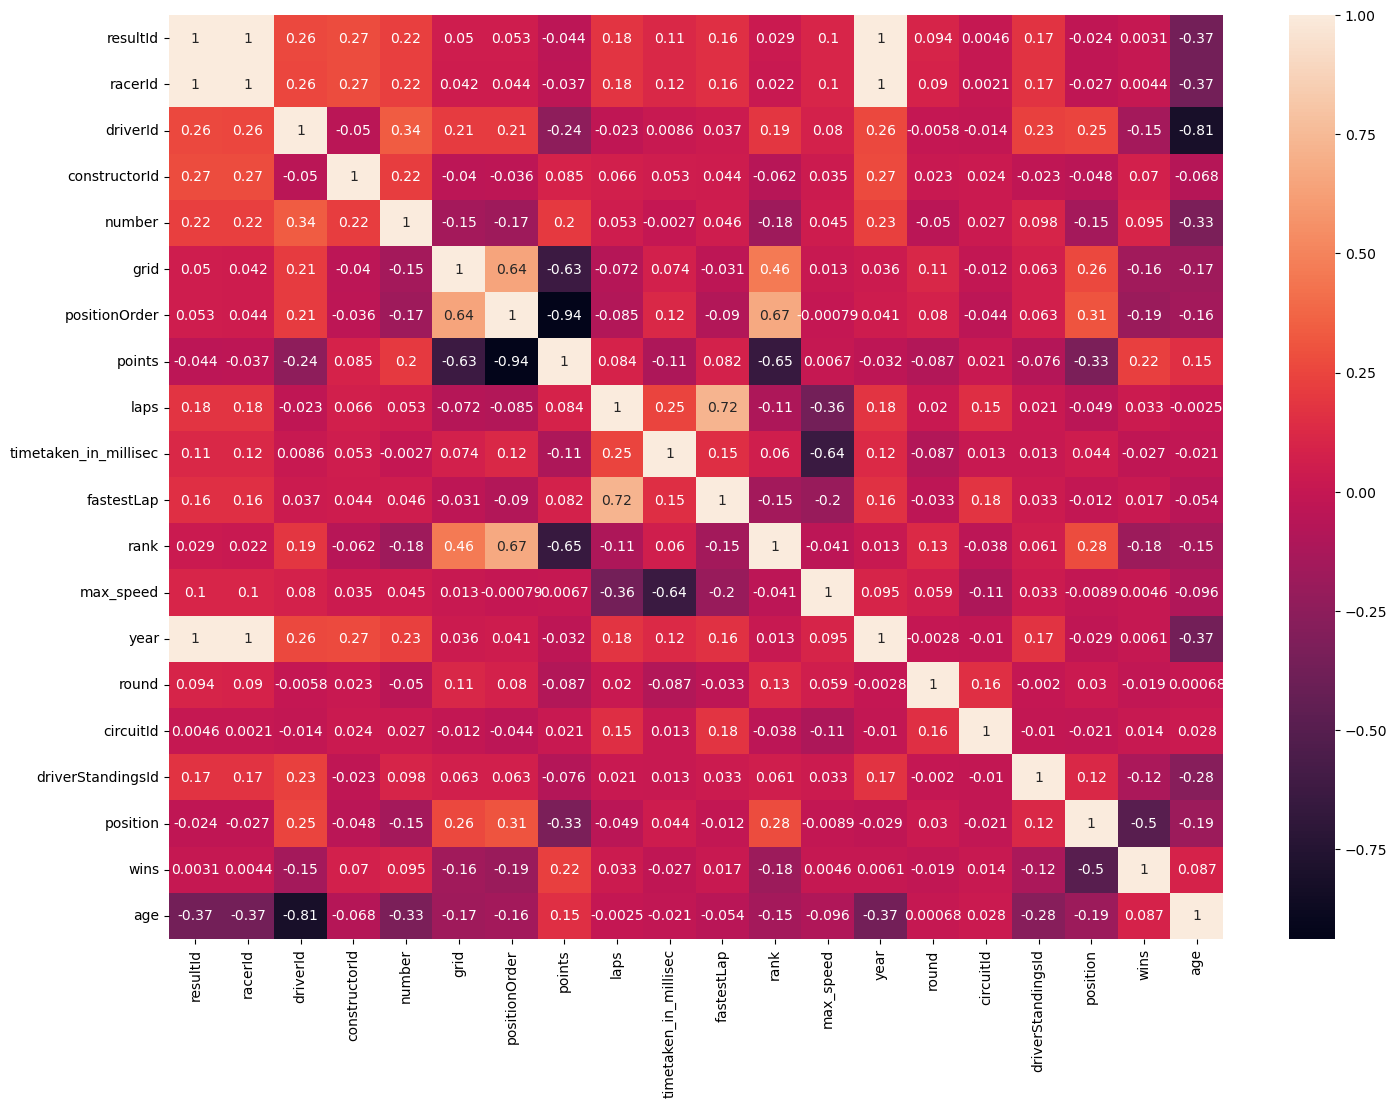

In [89]:
# heatmap

plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [90]:
num.remove('date')
num.remove('dob')
num.remove('statusId')

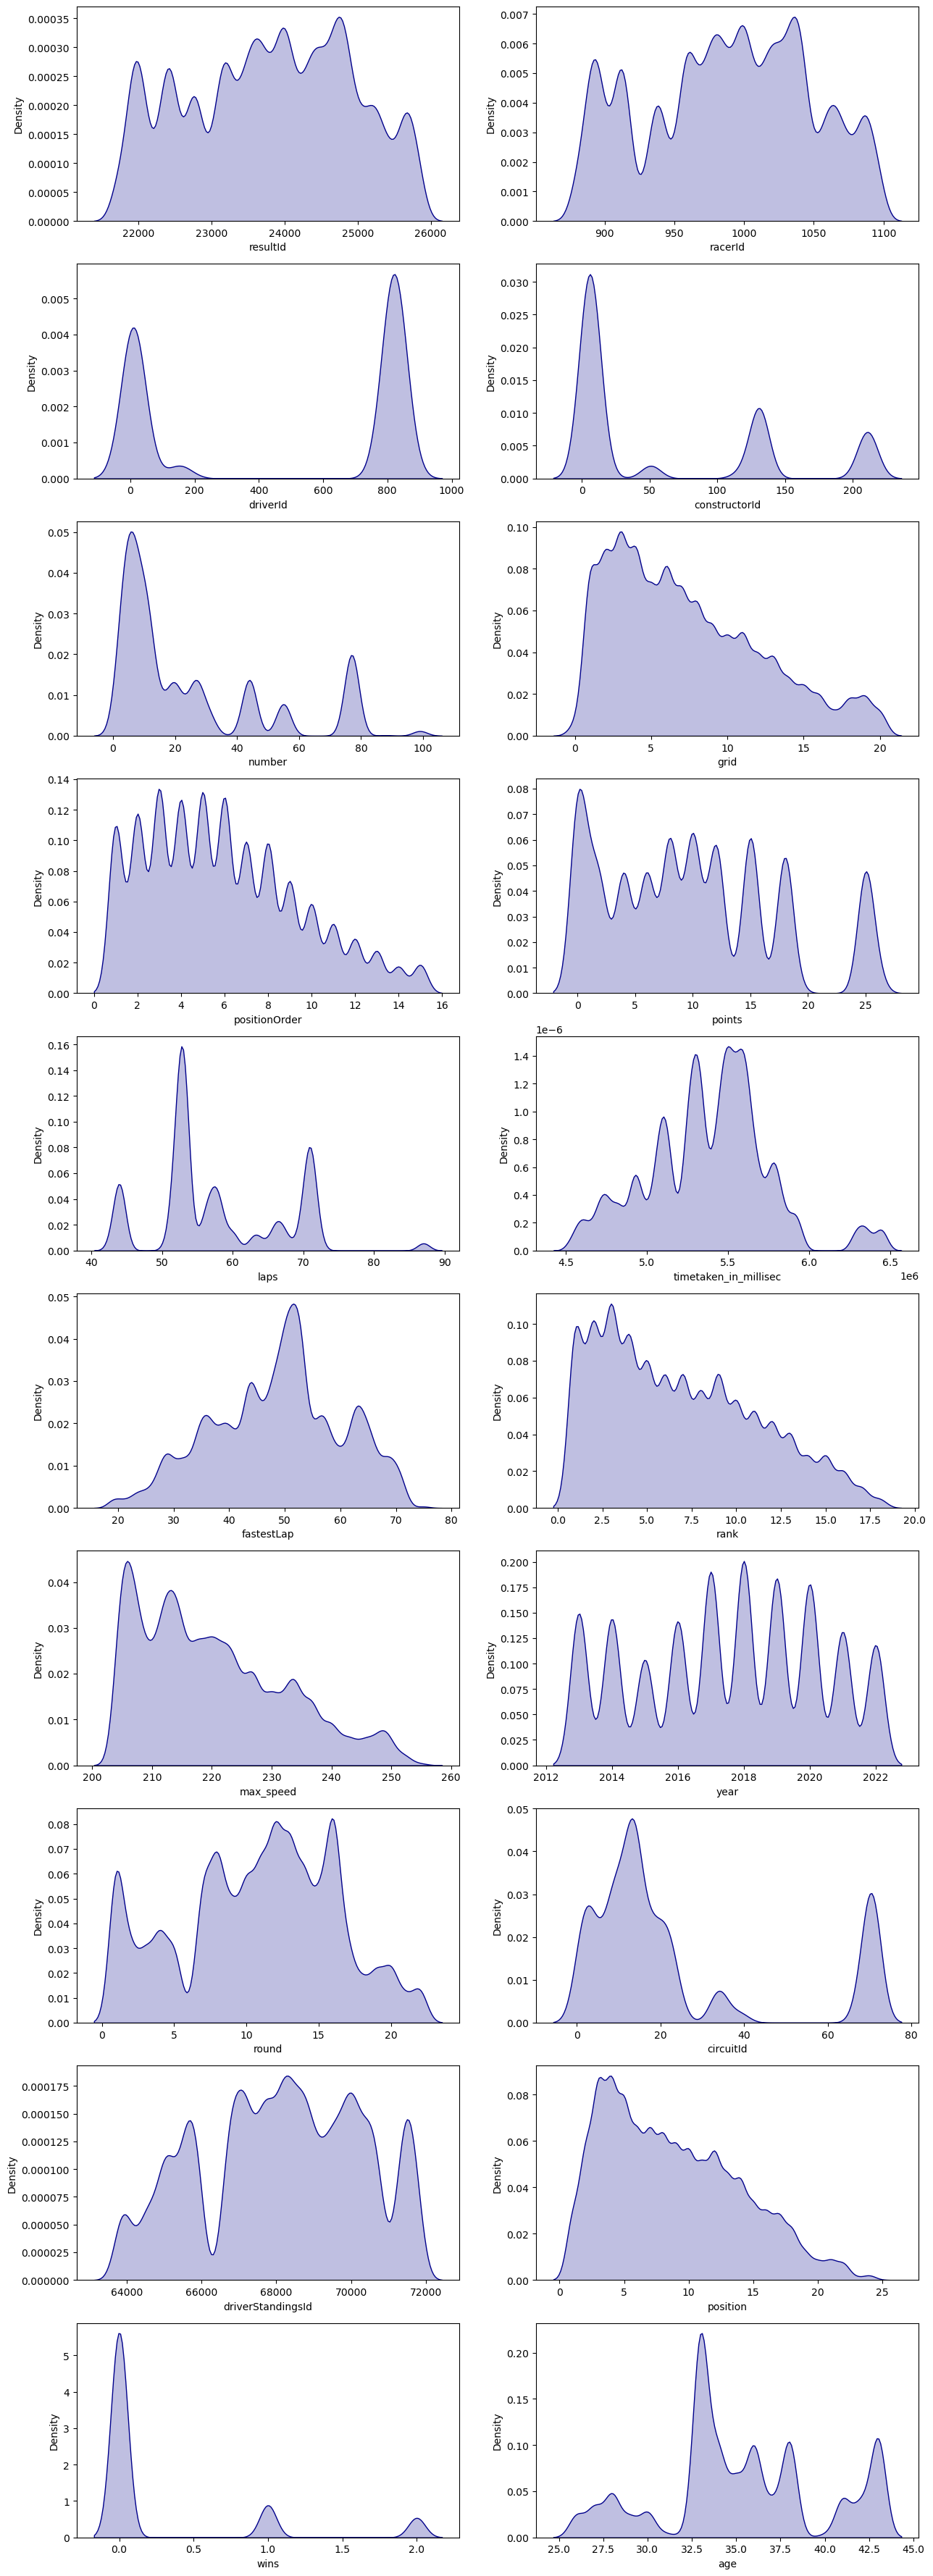

In [91]:
# kde plot for checking the normalization 

plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

In [92]:
df.skew()

resultId                -0.095542
racerId                 -0.123594
driverId                -0.249363
constructorId            0.920263
number                   1.224546
grid                     0.700191
positionOrder            0.578331
points                   0.508267
laps                     0.561147
timetaken_in_millisec    0.184192
fastestLap              -0.167482
rank                     0.515940
max_speed                0.655221
year                    -0.117326
round                   -0.153855
circuitId                1.296007
driverStandingsId       -0.174419
position                 0.546594
wins                     2.001286
age                      0.054300
dtype: float64

Still some columns are skewed even after outlier removal and skewness can be normalized during ML part.

# Encoding

I have choosen LabelEncoding instead of one hot encoding, because one hot will give you a various new columns based on the unique value. I will recommend LabelEncoding to use always, since it will replace in a single column for new value.

Note:
    
    * To represent a unicode string as a string of bytes is known as encoding.
    * To convert a string of bytes to a unicode string is known as decoding.

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [94]:
# encoding categorical columns

for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,circuitId,grand_prix,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_code,nationality,driverStandingsId,position,wins,company,status,driver_name,age
32208,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,20,21,7,21,7,16,4,21,6,5,2,1,15,70783,3,0,9,0,12,41.0
32209,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,20,21,7,21,7,16,4,21,6,5,2,1,15,70803,1,1,9,0,12,41.0
32210,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,20,21,7,21,7,16,4,21,6,5,2,1,15,70824,1,2,9,0,12,41.0
32299,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,20,21,7,21,7,16,4,21,6,5,2,1,15,63737,1,1,9,0,12,41.0
32300,22826,941,4,1,14.0,19,11,0.0,53,5922234.0,29.0,12.0,205.115,2015,15,71,20,21,7,21,7,16,4,21,6,5,2,1,15,63761,1,1,9,0,12,41.0


In [95]:
x = df.drop('driver_name',1)
y = df.driver_name

In [96]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

# ML Algorithms

In [97]:
# importing ML libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [98]:
clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [99]:
tree.export_text(clf)

'|--- feature_4 <= 66.00\n|   |--- feature_27 <= 32.50\n|   |   |--- feature_28 <= 0.50\n|   |   |   |--- class: 6\n|   |   |--- feature_28 >  0.50\n|   |   |   |--- feature_2 <= 2.00\n|   |   |   |   |--- class: 18\n|   |   |   |--- feature_2 >  2.00\n|   |   |   |   |--- feature_34 <= 42.50\n|   |   |   |   |   |--- class: 31\n|   |   |   |   |--- feature_34 >  42.50\n|   |   |   |   |   |--- class: 17\n|   |--- feature_27 >  32.50\n|   |   |--- class: 29\n|--- feature_4 >  66.00\n|   |--- feature_27 <= 5.00\n|   |   |--- class: 33\n|   |--- feature_27 >  5.00\n|   |   |--- feature_34 <= 33.50\n|   |   |   |--- class: 2\n|   |   |--- feature_34 >  33.50\n|   |   |   |--- feature_1 <= 965.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- feature_1 >  965.50\n|   |   |   |   |--- class: 27\n'

In [100]:
fn = list(df.columns)
fn.remove('driver_name')

# DT workflow

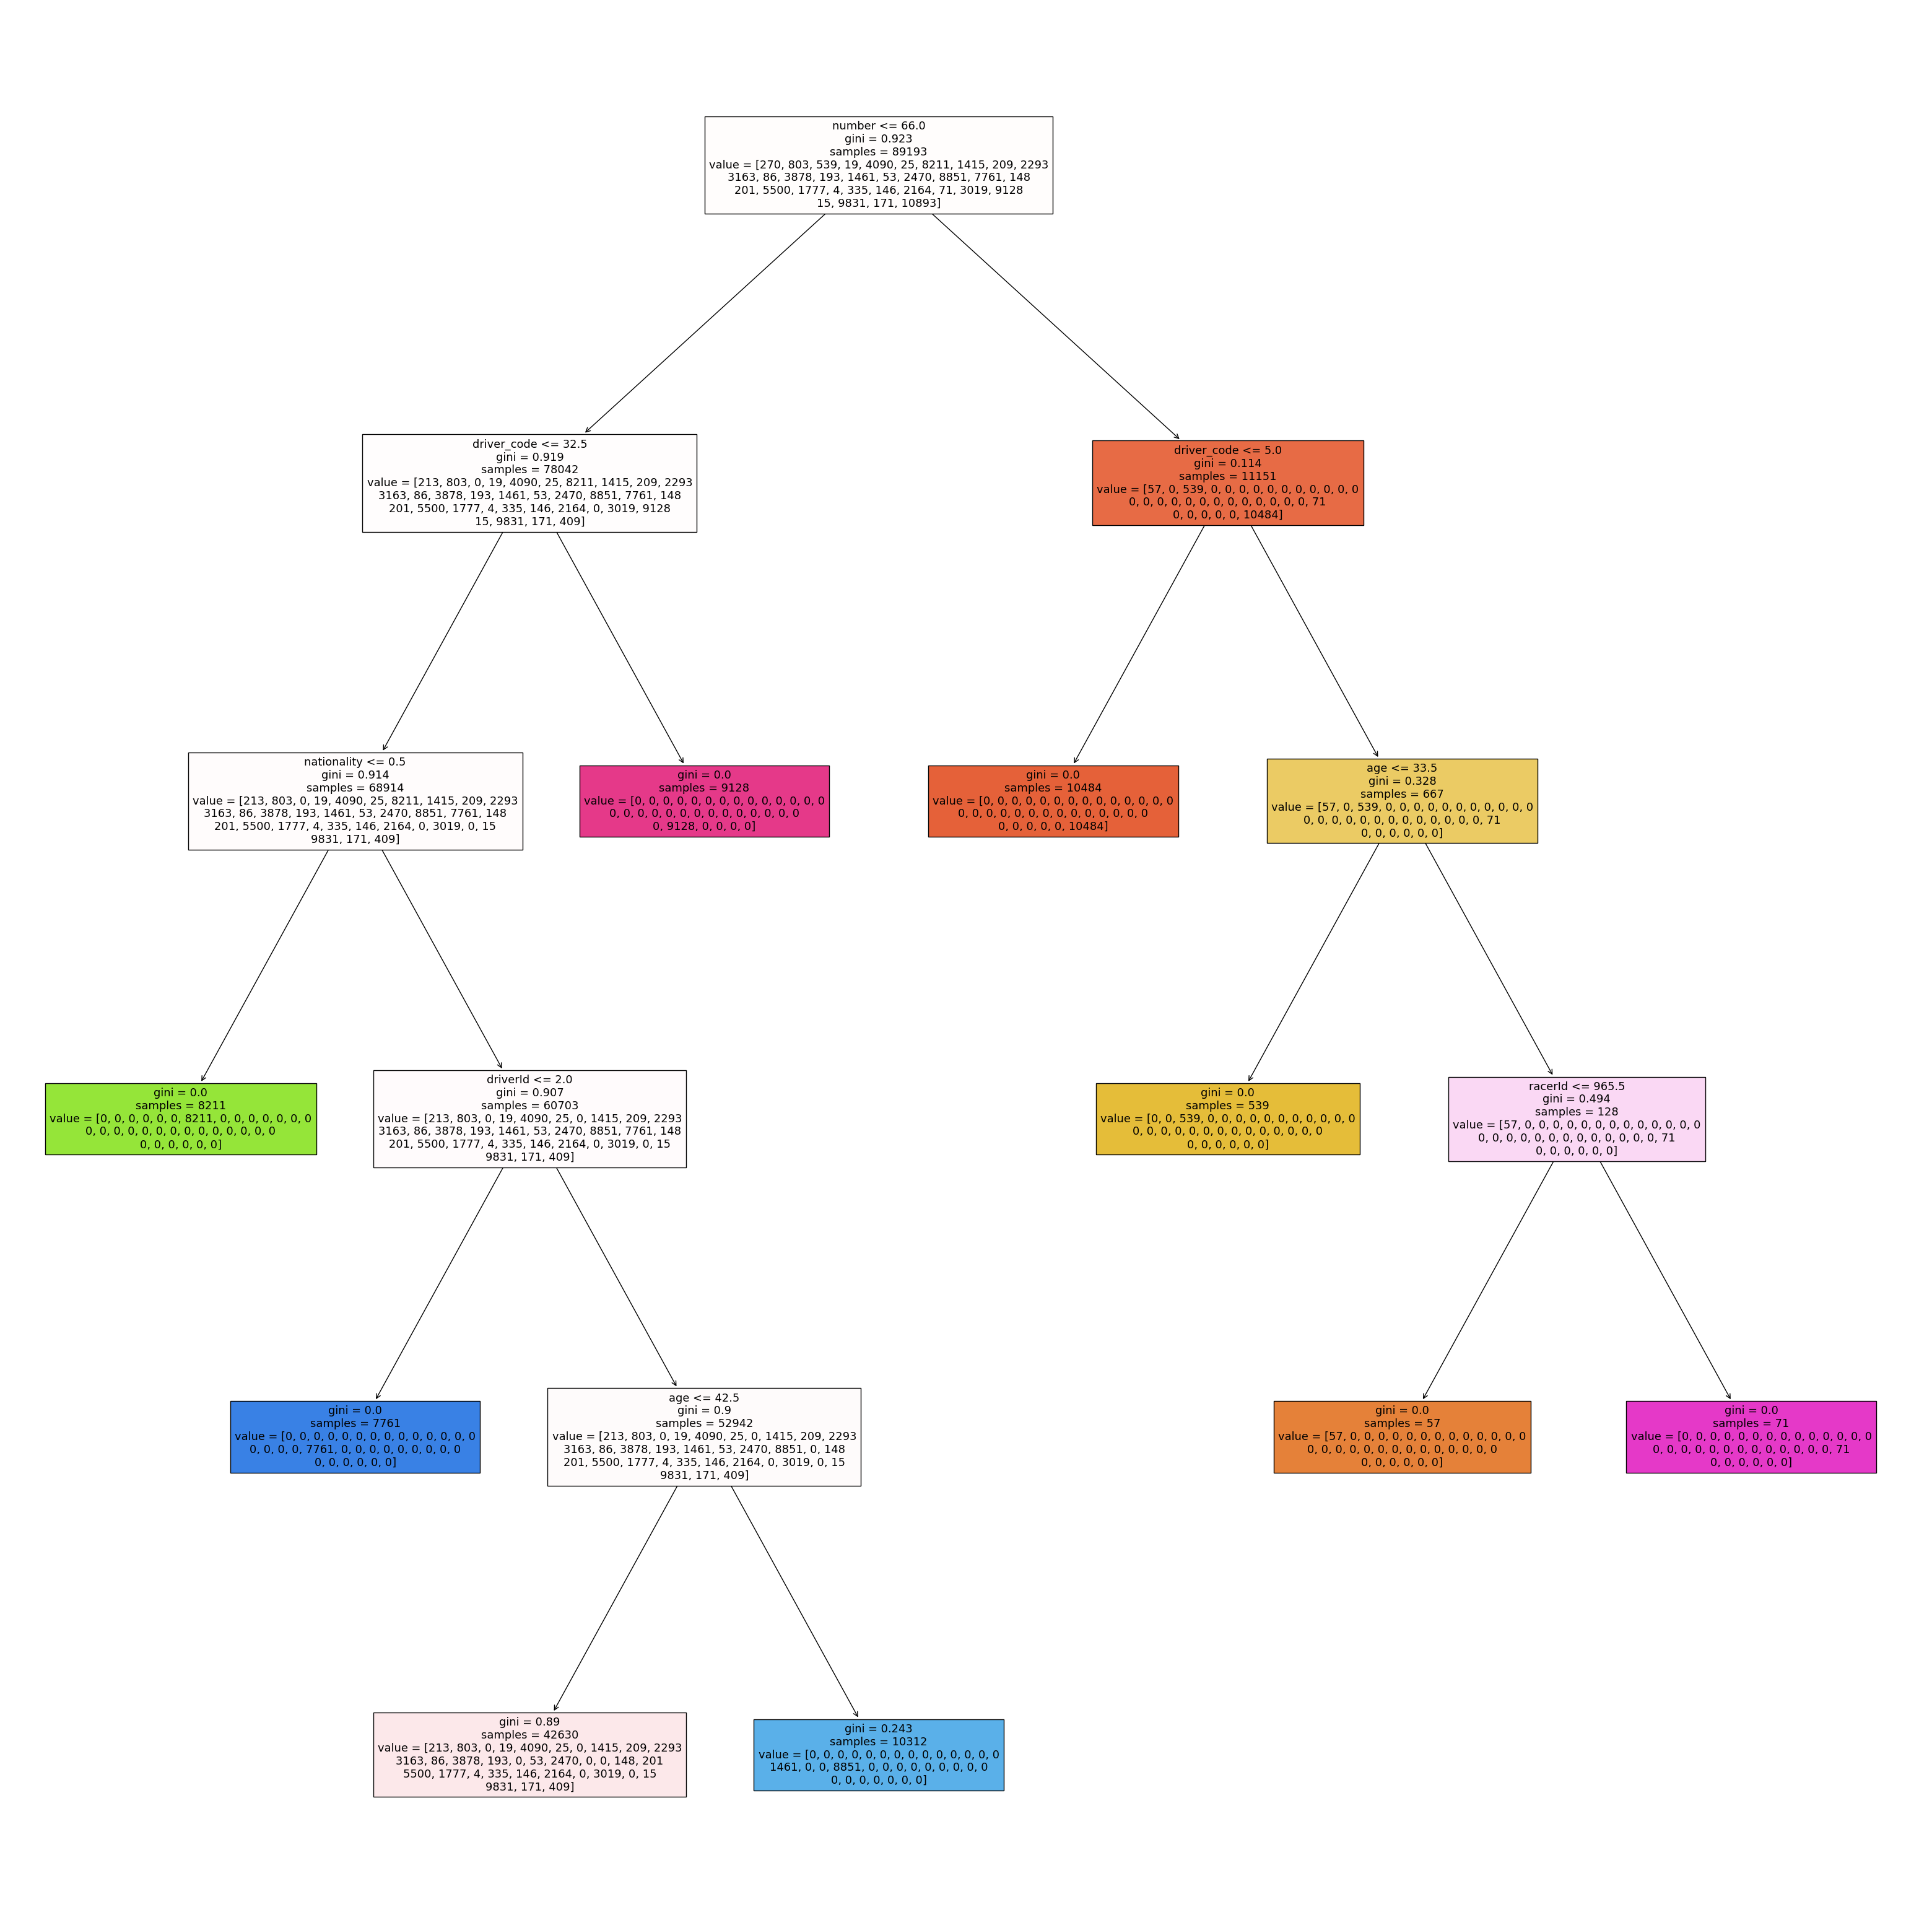

In [101]:
# plotting decision tree workflow 

fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,
               feature_names=fn,
               filled=True)

# Modeling the data

In [110]:
# classification ML algorithms 

lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [114]:
#li = [lr,sgd,knn,gb,rn,dt]
li = [lr,sgd,gb,rn,dt]
d = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypred = i.predict(xtest)
    print(i,":",accuracy_score(ypred,ytest)*100)
    d.update({str(i):i.score(xtest,ytest)*100})

LogisticRegression(solver='sag') : 14.840684350965311
SGDClassifier() : 3.628420446816303
GaussianNB() : 75.36493486108931
RandomForestClassifier() : 100.0
DecisionTreeClassifier() : 100.0


LogisticRegression(solver='sag') : 14.840684350965311
SGDClassifier() : 3.628420446816303
KNeighborsClassifier() : 100.0
GaussianNB() : 75.36493486108931
RandomForestClassifier() : 100.0
DecisionTreeClassifier() : 100.0 

LogisticRegression(solver='sag') : 99.96599173337519
SGDClassifier() : 98.74431015539162
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0

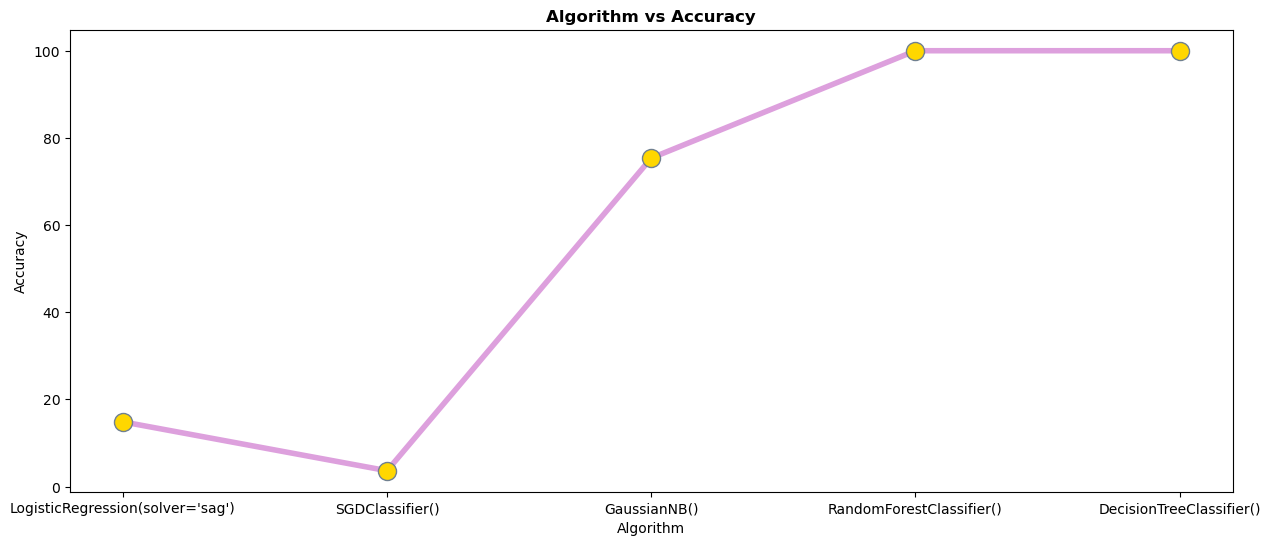

In [116]:
plt.figure(figsize=(15, 6))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='plum',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
plt.show()

As you can see, the accuracy of basic algorithm (logistic) and SGD is not good as expected. Since the data are skewed/denormalized, so it can be fixed by scaling the data.

# [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [121]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
# transform training data
X_train_norm = norm.transform(xtrain)
# transform testing data
X_test_norm = norm.transform(xtest)

In [123]:
li = [lr,sgd,rn,gb,dt]
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest)*100)
    di.update({str(i):i.score(X_test_norm,ytest)*100})

LogisticRegression(solver='sag') : 99.96599173337519
SGDClassifier() : 98.76785433997803
RandomForestClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


LogisticRegression(solver='sag') : 99.96599173337519
SGDClassifier() : 98.76785433997803
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0



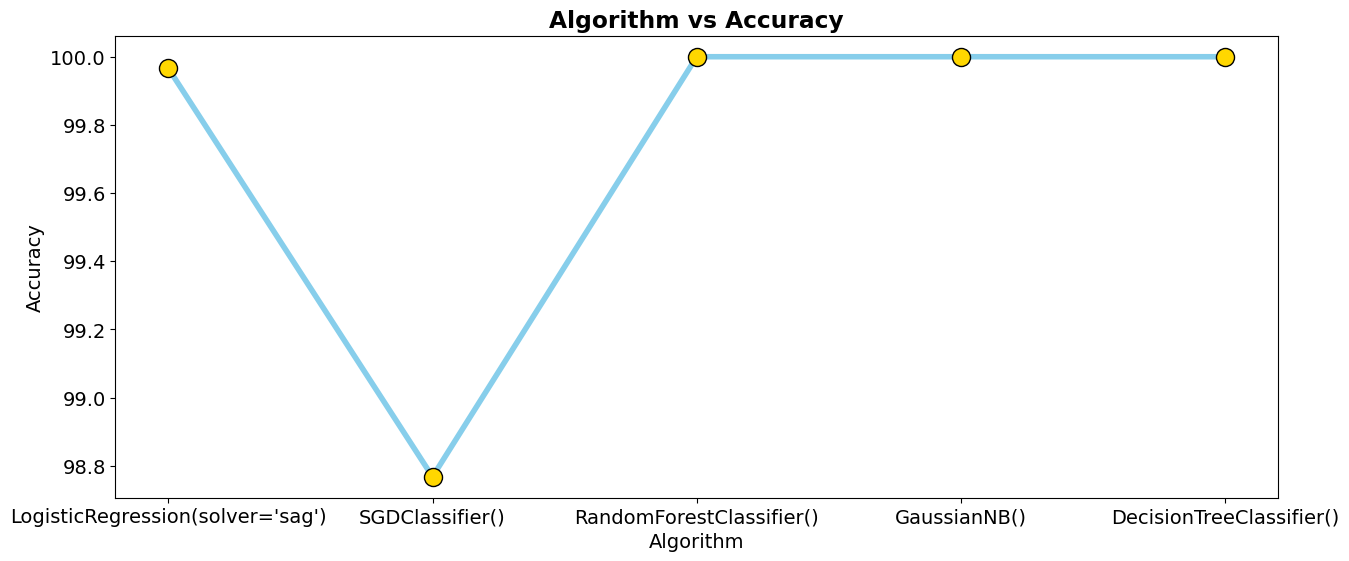

In [127]:
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 14})
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='skyblue',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
plt.show()

As you can see the accuracy are getting high for Logistic Regression and SGDClassifier, both the algorithms are performing well from bottom low to 99% accuracy by scaling. Hence this prove the importance of normalizing the data.

# [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [128]:
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
std = StandardScaler().fit(xtrain)
# transform train data
x_train_std = std.transform(xtrain)
# transform test data
x_test_std = std.transform(xtest)

In [129]:
li = [lr,sgd,rn,gb,dt]
dic = {}
for i in li:
    i.fit(x_train_std,ytrain)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dic.update({str(i):i.score(x_test_std,ytest)*100})

LogisticRegression(solver='sag') : 99.9973839794904
SGDClassifier() : 98.71553392978602
RandomForestClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


LogisticRegression(solver='sag') : 99.9973839794904
SGDClassifier() : 98.71553392978602
KNeighborsClassifier() : 100.0
RandomForestClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0

In [ ]:
plt.figure(figsize=(15, 6))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
plt.show()

# [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) 

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

In [131]:
from sklearn.preprocessing import RobustScaler
# fit scaler on train data
scaler = RobustScaler().fit(xtrain)
# transform train data
xtrain_scaled = scaler.transform(xtrain)
# transform test data
xtest_scaled = scaler.transform(xtest)

In [133]:
li = [lr,sgd,rn,gb,dt]
dics = {}
for i in li:
    i.fit(xtrain_scaled,ytrain)
    ypred = i.predict(xtest_scaled)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dics.update({str(i):i.score(xtest_scaled,ytest)*100})

LogisticRegression(solver='sag') : 99.9973839794904
SGDClassifier() : 99.22042588813896
RandomForestClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


LogisticRegression(solver='sag') : 99.9973839794904
SGDClassifier() : 99.22042588813896
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0



In [ ]:
plt.figure(figsize=(15, 6))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dics.keys(),dics.values(),marker='o',color='darkseagreen',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
plt.show()